# Classification model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import Binarizer
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix

In [2]:
df_clustering = pd.read_csv('data/df_clustering_KMEANS.csv')

In [3]:
df_clustering.head()

,apartment_id,window_noise_traffic_night,window_noise_train_night,view_buildings_mean,view_greenery_mean,view_ground_mean,view_highways_mean,view_pedestrians_mean,view_railway_tracks_mean,view_water_mean,view_mountains_sum,view_street_sum,mean_morning,mean_evening,cluster
0,00024dcb907dc1671ef48af550271427,17.786085,0.0,0.010573,0.014354,0.033920,0.0,0.002836,0.000000e+00,0.000000,0.000000,5.309107e-04,0.985548,0.896031,7
1,00048208e97e07b7b183718826929def,17.790932,0.0,0.002223,0.002297,0.014112,0.0,0.000205,0.000000e+00,0.000493,0.000071,1.419091e-03,0.770462,1.063340,7
2,00048321bf465caba119f73d57093299,28.146663,0.0,0.013962,0.011717,0.011977,0.0,0.000011,1.920943e-07,0.000000,0.000506,8.415804e-03,0.914291,2.432358,5
3,00075003b82a8cf375c274560aa6bc9c,19.688055,0.0,0.004333,0.002894,0.022964,0.0,0.002088,0.000000e+00,0.000000,0.000000,1.808636e-04,0.702243,1.273586,7
4,000916099693de3f997973f552fdff07,15.213498,0.0,0.000913,0.017949,0.024337,0.0,0.000006,0.000000e+00,0.000000,0.000000,9.432771e-07,0.779696,0.274397,4


In [4]:
df_clustering.shape

(42207, 15)

In [5]:
df_clustering.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42207 entries, 0 to 42206
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   apartment_id                42207 non-null  object 
 1   window_noise_traffic_night  42207 non-null  float64
 2   window_noise_train_night    42207 non-null  float64
 3   view_buildings_mean         42207 non-null  float64
 4   view_greenery_mean          42207 non-null  float64
 5   view_ground_mean            42207 non-null  float64
 6   view_highways_mean          42207 non-null  float64
 7   view_pedestrians_mean       42207 non-null  float64
 8   view_railway_tracks_mean    42207 non-null  float64
 9   view_water_mean             42207 non-null  float64
 10  view_mountains_sum          42207 non-null  float64
 11  view_street_sum             42207 non-null  float64
 12  mean_morning                42207 non-null  float64
 13  mean_evening                422

In [6]:
df_clustering.columns

Index(['apartment_id', 'window_noise_traffic_night',
       'window_noise_train_night', 'view_buildings_mean', 'view_greenery_mean',
       'view_ground_mean', 'view_highways_mean', 'view_pedestrians_mean',
       'view_railway_tracks_mean', 'view_water_mean', 'view_mountains_sum',
       'view_street_sum', 'mean_morning', 'mean_evening', 'cluster'],
      dtype='object')

In [7]:
df_clustering.describe().T

,count,mean,std,min,25%,50%,75%,max
window_noise_traffic_night,42207.0,23.420684,9.384667,0.0,1.746458e+01,23.020171,2.921446e+01,63.348207
window_noise_train_night,42207.0,3.455455,7.301887,0.0,0.000000e+00,0.000000,2.916275e+00,52.433854
view_buildings_mean,42207.0,0.012187,0.010559,0.0,4.617712e-03,0.009370,1.666121e-02,0.193374
view_greenery_mean,42207.0,0.008133,0.007597,0.0,2.722113e-03,0.006276,1.122645e-02,0.105952
view_ground_mean,42207.0,0.020657,0.012164,0.0,1.192464e-02,0.019390,2.784508e-02,0.226361
view_highways_mean,42207.0,0.000009,0.000134,0.0,0.000000e+00,0.000000,0.000000e+00,0.006514
view_pedestrians_mean,42207.0,0.000475,0.000900,0.0,6.250699e-06,0.000099,5.561238e-04,0.013564
view_railway_tracks_mean,42207.0,0.000042,0.000228,0.0,0.000000e+00,0.000000,3.422943e-07,0.005677
view_water_mean,42207.0,0.000113,0.000684,0.0,0.000000e+00,0.000000,6.740334e-06,0.023175
view_mountains_sum,42207.0,0.000356,0.000965,0.0,4.313919e-07,0.000033,2.427432e-04,0.019311


## Selecting high correlated variables

In [8]:
corr = df_clustering.drop(['apartment_id', 'cluster'], axis=1).corrwith(df_clustering['cluster'], method='spearman').sort_values(ascending=False)
corr

mean_morning                  0.330036
mean_evening                  0.322670
view_mountains_sum            0.171681
view_greenery_mean            0.134081
view_pedestrians_mean         0.124420
view_ground_mean              0.091417
view_water_mean               0.066092
view_buildings_mean           0.041363
view_street_sum              -0.006922
view_highways_mean           -0.077527
view_railway_tracks_mean     -0.092577
window_noise_train_night     -0.151711
window_noise_traffic_night   -0.241450
dtype: float64

In [9]:
df_clustering.drop('apartment_id', axis=1).corr()

,window_noise_traffic_night,window_noise_train_night,view_buildings_mean,view_greenery_mean,view_ground_mean,view_highways_mean,view_pedestrians_mean,view_railway_tracks_mean,view_water_mean,view_mountains_sum,view_street_sum,mean_morning,mean_evening,cluster
window_noise_traffic_night,1.000000,0.165526,0.103286,0.079254,0.183980,0.096944,-0.022642,0.101406,0.028831,-0.013110,0.356776,0.138037,0.114724,-0.310077
window_noise_train_night,0.165526,1.000000,-0.065497,-0.007633,0.054035,0.051491,-0.003963,0.207555,0.051803,0.031601,0.029748,0.036099,-0.000360,-0.151887
view_buildings_mean,0.103286,-0.065497,1.000000,-0.093820,-0.092780,-0.023294,-0.124932,0.147331,-0.025866,0.018482,0.365125,0.228888,0.179869,0.024708
view_greenery_mean,0.079254,-0.007633,-0.093820,1.000000,0.169187,-0.017939,0.035570,0.012452,-0.004630,-0.023499,0.076970,0.169112,0.152643,0.080701
view_ground_mean,0.183980,0.054035,-0.092780,0.169187,1.000000,-0.003031,0.125977,-0.038021,-0.012898,0.034449,0.032416,0.229701,0.215074,0.065567
view_highways_mean,0.096944,0.051491,-0.023294,-0.017939,-0.003031,1.000000,0.005631,0.000873,0.048601,-0.002713,0.025979,0.048468,0.033139,-0.044034
view_pedestrians_mean,-0.022642,-0.003963,-0.124932,0.035570,0.125977,0.005631,1.000000,0.010569,0.040748,-0.024831,-0.100320,0.098269,0.086096,0.075181
view_railway_tracks_mean,0.101406,0.207555,0.147331,0.012452,-0.038021,0.000873,0.010569,1.000000,0.011063,-0.005194,0.205223,0.075247,0.046230,-0.078621
view_water_mean,0.028831,0.051803,-0.025866,-0.004630,-0.012898,0.048601,0.040748,0.011063,1.000000,0.052516,0.011429,0.083231,0.049407,-0.002472
view_mountains_sum,-0.013110,0.031601,0.018482,-0.023499,0.034449,-0.002713,-0.024831,-0.005194,0.052516,1.000000,0.014464,0.189973,0.155126,0.092850


In [10]:
corr_matrix_all = df_clustering.select_dtypes(include=['int64', 'float64']).corr()

mask = np.triu(np.ones_like(corr_matrix_all, dtype=bool))
corr_matrix_masked = corr_matrix_all.mask(mask)
fig = px.imshow(corr_matrix_masked, width=800, height=800, title='Pearson Correlation between Variables', color_continuous_scale='Viridis')
fig.show()

In [11]:
corr = corr_matrix_masked.abs().unstack().sort_values(ascending=False).reset_index()
corr.rename(columns={'level_0': 'Variable 1', 'level_1': 'Variable 2', 0: 'Correlation'}, inplace=True)
corr = corr[corr['Variable 1'] != corr['Variable 2']]
corr.head(20)

,Variable 1,Variable 2,Correlation
0,mean_morning,mean_evening,0.594955
1,view_buildings_mean,view_street_sum,0.365125
2,window_noise_traffic_night,view_street_sum,0.356776
3,window_noise_traffic_night,cluster,0.310077
4,mean_evening,cluster,0.292246
5,mean_morning,cluster,0.291941
6,view_ground_mean,mean_morning,0.229701
7,view_buildings_mean,mean_morning,0.228888
8,view_ground_mean,mean_evening,0.215074
9,window_noise_train_night,view_railway_tracks_mean,0.207555


In [12]:
# selecting variables for the final model

df_class = df_clustering.drop(['mean_evening', 'view_street_sum', 'view_buildings_mean', 'view_water_mean'], axis=1)
df_class.head()

,apartment_id,window_noise_traffic_night,window_noise_train_night,view_greenery_mean,view_ground_mean,view_highways_mean,view_pedestrians_mean,view_railway_tracks_mean,view_mountains_sum,mean_morning,cluster
0,00024dcb907dc1671ef48af550271427,17.786085,0.0,0.014354,0.033920,0.0,0.002836,0.000000e+00,0.000000,0.985548,7
1,00048208e97e07b7b183718826929def,17.790932,0.0,0.002297,0.014112,0.0,0.000205,0.000000e+00,0.000071,0.770462,7
2,00048321bf465caba119f73d57093299,28.146663,0.0,0.011717,0.011977,0.0,0.000011,1.920943e-07,0.000506,0.914291,5
3,00075003b82a8cf375c274560aa6bc9c,19.688055,0.0,0.002894,0.022964,0.0,0.002088,0.000000e+00,0.000000,0.702243,7
4,000916099693de3f997973f552fdff07,15.213498,0.0,0.017949,0.024337,0.0,0.000006,0.000000e+00,0.000000,0.779696,4


In [13]:
df_class.shape

(42207, 11)

In [14]:
df_class.describe().T

,count,mean,std,min,25%,50%,75%,max
window_noise_traffic_night,42207.0,23.420684,9.384667,0.0,1.746458e+01,23.020171,2.921446e+01,63.348207
window_noise_train_night,42207.0,3.455455,7.301887,0.0,0.000000e+00,0.000000,2.916275e+00,52.433854
view_greenery_mean,42207.0,0.008133,0.007597,0.0,2.722113e-03,0.006276,1.122645e-02,0.105952
view_ground_mean,42207.0,0.020657,0.012164,0.0,1.192464e-02,0.019390,2.784508e-02,0.226361
view_highways_mean,42207.0,0.000009,0.000134,0.0,0.000000e+00,0.000000,0.000000e+00,0.006514
view_pedestrians_mean,42207.0,0.000475,0.000900,0.0,6.250699e-06,0.000099,5.561238e-04,0.013564
view_railway_tracks_mean,42207.0,0.000042,0.000228,0.0,0.000000e+00,0.000000,3.422943e-07,0.005677
view_mountains_sum,42207.0,0.000356,0.000965,0.0,4.313919e-07,0.000033,2.427432e-04,0.019311
mean_morning,42207.0,1.058660,0.677106,0.0,5.751468e-01,0.920881,1.422737e+00,6.492165
cluster,42207.0,5.299855,2.214309,1.0,4.000000e+00,6.000000,7.000000e+00,8.000000


In [15]:
df_class.columns

Index(['apartment_id', 'window_noise_traffic_night',
       'window_noise_train_night', 'view_greenery_mean', 'view_ground_mean',
       'view_highways_mean', 'view_pedestrians_mean',
       'view_railway_tracks_mean', 'view_mountains_sum', 'mean_morning',
       'cluster'],
      dtype='object')

## Discretization

We decided to utilize all columns in the dataset, excluding those with very small values or those whose values were not strictly increasing, such as view_highways_mean, view_railway_tracks_mean, view_water_mean, and view_mountains_sum.

The process leading to this decision is documented in notebook 3-anexo.

In [16]:
df_class_disc=df_clustering.copy()

In [17]:
df_class_disc.describe().T

,count,mean,std,min,25%,50%,75%,max
window_noise_traffic_night,42207.0,23.420684,9.384667,0.0,1.746458e+01,23.020171,2.921446e+01,63.348207
window_noise_train_night,42207.0,3.455455,7.301887,0.0,0.000000e+00,0.000000,2.916275e+00,52.433854
view_buildings_mean,42207.0,0.012187,0.010559,0.0,4.617712e-03,0.009370,1.666121e-02,0.193374
view_greenery_mean,42207.0,0.008133,0.007597,0.0,2.722113e-03,0.006276,1.122645e-02,0.105952
view_ground_mean,42207.0,0.020657,0.012164,0.0,1.192464e-02,0.019390,2.784508e-02,0.226361
view_highways_mean,42207.0,0.000009,0.000134,0.0,0.000000e+00,0.000000,0.000000e+00,0.006514
view_pedestrians_mean,42207.0,0.000475,0.000900,0.0,6.250699e-06,0.000099,5.561238e-04,0.013564
view_railway_tracks_mean,42207.0,0.000042,0.000228,0.0,0.000000e+00,0.000000,3.422943e-07,0.005677
view_water_mean,42207.0,0.000113,0.000684,0.0,0.000000e+00,0.000000,6.740334e-06,0.023175
view_mountains_sum,42207.0,0.000356,0.000965,0.0,4.313919e-07,0.000033,2.427432e-04,0.019311


In [18]:
df_class_disc.drop(['view_highways_mean', 'view_railway_tracks_mean', 'view_mountains_sum','view_water_mean' ], axis=1, inplace=True)

In [19]:
df_class_disc.describe().T

,count,mean,std,min,25%,50%,75%,max
window_noise_traffic_night,42207.0,23.420684,9.384667,0.0,17.464577,23.020171,29.214459,63.348207
window_noise_train_night,42207.0,3.455455,7.301887,0.0,0.000000,0.000000,2.916275,52.433854
view_buildings_mean,42207.0,0.012187,0.010559,0.0,0.004618,0.009370,0.016661,0.193374
view_greenery_mean,42207.0,0.008133,0.007597,0.0,0.002722,0.006276,0.011226,0.105952
view_ground_mean,42207.0,0.020657,0.012164,0.0,0.011925,0.019390,0.027845,0.226361
view_pedestrians_mean,42207.0,0.000475,0.000900,0.0,0.000006,0.000099,0.000556,0.013564
view_street_sum,42207.0,0.001968,0.002679,0.0,0.000215,0.000981,0.002639,0.037825
mean_morning,42207.0,1.058660,0.677106,0.0,0.575147,0.920881,1.422737,6.492165
mean_evening,42207.0,1.102817,0.688613,0.0,0.586005,1.015774,1.482600,8.311539
cluster,42207.0,5.299855,2.214309,1.0,4.000000,6.000000,7.000000,8.000000


In [20]:
df_class_disc.columns

Index(['apartment_id', 'window_noise_traffic_night',
       'window_noise_train_night', 'view_buildings_mean', 'view_greenery_mean',
       'view_ground_mean', 'view_pedestrians_mean', 'view_street_sum',
       'mean_morning', 'mean_evening', 'cluster'],
      dtype='object')

To discretize the columns related to noise, we will classify the noise levels as follows: more than 40 dB is considered a low noise level, up to 55 dB is a medium noise level, and more than 55 dB is a high noise level.

In [21]:
df_class_disc['window_noise_traffic_night'] = pd.cut(df_class_disc['window_noise_traffic_night'], bins=[-1, 24, 40, 55, 65], labels=['1', '2', '3', '4'])
df_class_disc['window_noise_train_night'] = pd.cut(df_class_disc['window_noise_train_night'], bins=[-1, 3, 40, 55, 65], labels=['1', '2', '3', '4'])


For the columns related to views and sunlight, we will use the 1st, 2nd, and 3rd quartiles to classify them into four groups.

In [22]:
columns_to_discretize = ['view_buildings_mean', 'view_greenery_mean', 'view_ground_mean', 'view_pedestrians_mean', 'view_street_sum', 'mean_morning', 'mean_evening']


for column in columns_to_discretize:
    Q1 = df_class_disc[column].quantile(0.25)
    Q3 = df_class_disc[column].quantile(0.75)
    mean = df_class_disc[column].mean()
    bins = sorted([df_class_disc[column].min(), Q1, mean, Q3, df_class_disc[column].max()])
    df_class_disc[column] = pd.cut(df_class_disc[column], bins=bins, labels=['1', '2', '3', '4'], include_lowest=True)



for column in columns_to_discretize:
    print(f"Value counts for {column}:")
    print(df_class_disc[column].value_counts())

Value counts for view_buildings_mean:
view_buildings_mean
2    15463
1    10552
4    10552
3     5640
Name: count, dtype: int64
Value counts for view_greenery_mean:
view_greenery_mean
2    15285
1    10552
4    10552
3     5818
Name: count, dtype: int64
Value counts for view_ground_mean:
view_ground_mean
2    12333
1    10552
4    10552
3     8770
Name: count, dtype: int64
Value counts for view_pedestrians_mean:
view_pedestrians_mean
2    19944
1    10552
4    10552
3     1159
Name: count, dtype: int64
Value counts for view_street_sum:
view_street_sum
2    17861
1    10552
4    10552
3     3242
Name: count, dtype: int64
Value counts for mean_morning:
mean_morning
2    13993
1    10552
4    10552
3     7110
Name: count, dtype: int64
Value counts for mean_evening:
mean_evening
2    12722
1    10552
4    10552
3     8381
Name: count, dtype: int64


In [23]:
for column in columns_to_discretize:
    print(f"Value counts for {column}:")
    print(df_class_disc[column].value_counts())

Value counts for view_buildings_mean:
view_buildings_mean
2    15463
1    10552
4    10552
3     5640
Name: count, dtype: int64
Value counts for view_greenery_mean:
view_greenery_mean
2    15285
1    10552
4    10552
3     5818
Name: count, dtype: int64
Value counts for view_ground_mean:
view_ground_mean
2    12333
1    10552
4    10552
3     8770
Name: count, dtype: int64
Value counts for view_pedestrians_mean:
view_pedestrians_mean
2    19944
1    10552
4    10552
3     1159
Name: count, dtype: int64
Value counts for view_street_sum:
view_street_sum
2    17861
1    10552
4    10552
3     3242
Name: count, dtype: int64
Value counts for mean_morning:
mean_morning
2    13993
1    10552
4    10552
3     7110
Name: count, dtype: int64
Value counts for mean_evening:
mean_evening
2    12722
1    10552
4    10552
3     8381
Name: count, dtype: int64


In [24]:
df_class_disc.head()

,apartment_id,window_noise_traffic_night,window_noise_train_night,view_buildings_mean,view_greenery_mean,view_ground_mean,view_pedestrians_mean,view_street_sum,mean_morning,mean_evening,cluster
0,00024dcb907dc1671ef48af550271427,1,1,2,4,4,4,2,2,2,7
1,00048208e97e07b7b183718826929def,1,1,1,1,2,2,2,2,2,7
2,00048321bf465caba119f73d57093299,2,1,3,4,2,2,4,2,4,5
3,00075003b82a8cf375c274560aa6bc9c,1,1,1,2,3,4,1,2,3,7
4,000916099693de3f997973f552fdff07,1,1,1,4,3,1,1,2,1,4


In [25]:
df_class_disc.describe().T  

,count,mean,std,min,25%,50%,75%,max
cluster,42207.0,5.299855,2.214309,1.0,4.0,6.0,7.0,8.0


In [26]:
df_class_disc.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42207 entries, 0 to 42206
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   apartment_id                42207 non-null  object  
 1   window_noise_traffic_night  42207 non-null  category
 2   window_noise_train_night    42207 non-null  category
 3   view_buildings_mean         42207 non-null  category
 4   view_greenery_mean          42207 non-null  category
 5   view_ground_mean            42207 non-null  category
 6   view_pedestrians_mean       42207 non-null  category
 7   view_street_sum             42207 non-null  category
 8   mean_morning                42207 non-null  category
 9   mean_evening                42207 non-null  category
 10  cluster                     42207 non-null  int64   
dtypes: category(9), int64(1), object(1)
memory usage: 1.0+ MB


## First modelling: multivariable classification

In [27]:
df_class_disc = df_class_disc.apply(pd.to_numeric, errors='coerce')


In [28]:
df_class_disc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42207 entries, 0 to 42206
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   apartment_id                0 non-null      float64
 1   window_noise_traffic_night  42207 non-null  int64  
 2   window_noise_train_night    42207 non-null  int64  
 3   view_buildings_mean         42207 non-null  int64  
 4   view_greenery_mean          42207 non-null  int64  
 5   view_ground_mean            42207 non-null  int64  
 6   view_pedestrians_mean       42207 non-null  int64  
 7   view_street_sum             42207 non-null  int64  
 8   mean_morning                42207 non-null  int64  
 9   mean_evening                42207 non-null  int64  
 10  cluster                     42207 non-null  int64  
dtypes: float64(1), int64(10)
memory usage: 3.5 MB


In [29]:
df_class_disc.head()

,apartment_id,window_noise_traffic_night,window_noise_train_night,view_buildings_mean,view_greenery_mean,view_ground_mean,view_pedestrians_mean,view_street_sum,mean_morning,mean_evening,cluster
0,NaN,1,1,2,4,4,4,2,2,2,7
1,NaN,1,1,1,1,2,2,2,2,2,7
2,NaN,2,1,3,4,2,2,4,2,4,5
3,NaN,1,1,1,2,3,4,1,2,3,7
4,NaN,1,1,1,4,3,1,1,2,1,4


In [30]:
X = df_class_disc.drop(['cluster', 'apartment_id'], axis=1)
y = df_class_disc['cluster']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

We will use the following models to classify the apartments into the 8 classes of quality:

### Logistic regression

In [32]:
logreg = LogisticRegression(multi_class='multinomial')
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           1       0.64      0.52      0.57      1613
           2       0.00      0.00      0.00       154
           3       0.33      0.33      0.33       553
           4       0.69      0.55      0.61      2226
           5       0.66      0.74      0.70      1292
           6       0.45      0.73      0.55      1184
           7       0.63      0.63      0.63      4074
           8       0.73      0.74      0.74      1567

    accuracy                           0.61     12663
   macro avg       0.52      0.53      0.52     12663
weighted avg       0.62      0.61      0.61     12663



c:\Users\Win10\Desktop\UPGRADE\BOOTCAMP_PYTHON\mi_entorno\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

c:\Users\Win10\Desktop\UPGRADE\BOOTCAMP_PYTHON\mi_entorno\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\Win10\Desktop\UPGRADE\BOOTCAMP_PYTHON\mi_entorno\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no 

### KNN

In [33]:
weights = 'distance'
p = 2
n_neighbours = 5

clf = KNeighborsClassifier(n_neighbors = n_neighbours, weights = weights, p = p)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.58      0.64      0.61      1613
           2       0.37      0.27      0.31       154
           3       0.46      0.47      0.46       553
           4       0.62      0.67      0.64      2226
           5       0.63      0.71      0.67      1292
           6       0.56      0.51      0.53      1184
           7       0.63      0.59      0.61      4074
           8       0.72      0.67      0.70      1567

    accuracy                           0.62     12663
   macro avg       0.57      0.57      0.57     12663
weighted avg       0.62      0.62      0.62     12663



### Naive bayes

#### Gaussian

In [34]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred_gnb = gnb.predict(X_test)

print(classification_report(y_test, y_pred_gnb))

              precision    recall  f1-score   support

           1       0.65      0.53      0.58      1613
           2       0.14      0.03      0.05       154
           3       0.33      0.00      0.00       553
           4       0.36      0.89      0.52      2226
           5       0.67      0.64      0.66      1292
           6       0.37      0.99      0.54      1184
           7       0.55      0.15      0.23      4074
           8       0.64      0.17      0.26      1567

    accuracy                           0.45     12663
   macro avg       0.46      0.42      0.36     12663
weighted avg       0.52      0.45      0.39     12663



### Support vector machine

In [35]:
svc = SVC(decision_function_shape='ovr')
svc.fit(X_train, y_train)
y_preds = svc.predict(X_test)

print(classification_report(y_test, y_preds))


              precision    recall  f1-score   support

           1       0.68      0.52      0.59      1613
           2       0.00      0.00      0.00       154
           3       0.48      0.29      0.36       553
           4       0.71      0.58      0.64      2226
           5       0.67      0.77      0.72      1292
           6       0.45      0.85      0.59      1184
           7       0.65      0.64      0.65      4074
           8       0.75      0.75      0.75      1567

    accuracy                           0.64     12663
   macro avg       0.55      0.55      0.54     12663
weighted avg       0.65      0.64      0.63     12663



c:\Users\Win10\Desktop\UPGRADE\BOOTCAMP_PYTHON\mi_entorno\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\Win10\Desktop\UPGRADE\BOOTCAMP_PYTHON\mi_entorno\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\Win10\Desktop\UPGRADE\BOOTCAMP_PYTHON\mi_entorno\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



### AdaBoost

In [36]:
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
y_preds = ada.predict(X_test)

print(classification_report(y_test, y_preds))

c:\Users\Win10\Desktop\UPGRADE\BOOTCAMP_PYTHON\mi_entorno\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



              precision    recall  f1-score   support

           1       0.55      0.65      0.60      1613
           2       0.00      0.00      0.00       154
           3       0.38      0.11      0.18       553
           4       0.47      0.22      0.30      2226
           5       0.51      0.73      0.60      1292
           6       0.42      0.78      0.55      1184
           7       0.52      0.50      0.51      4074
           8       0.66      0.66      0.66      1567

    accuracy                           0.52     12663
   macro avg       0.44      0.46      0.42     12663
weighted avg       0.51      0.52      0.49     12663



c:\Users\Win10\Desktop\UPGRADE\BOOTCAMP_PYTHON\mi_entorno\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\Win10\Desktop\UPGRADE\BOOTCAMP_PYTHON\mi_entorno\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\Win10\Desktop\UPGRADE\BOOTCAMP_PYTHON\mi_entorno\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



### Decision trees

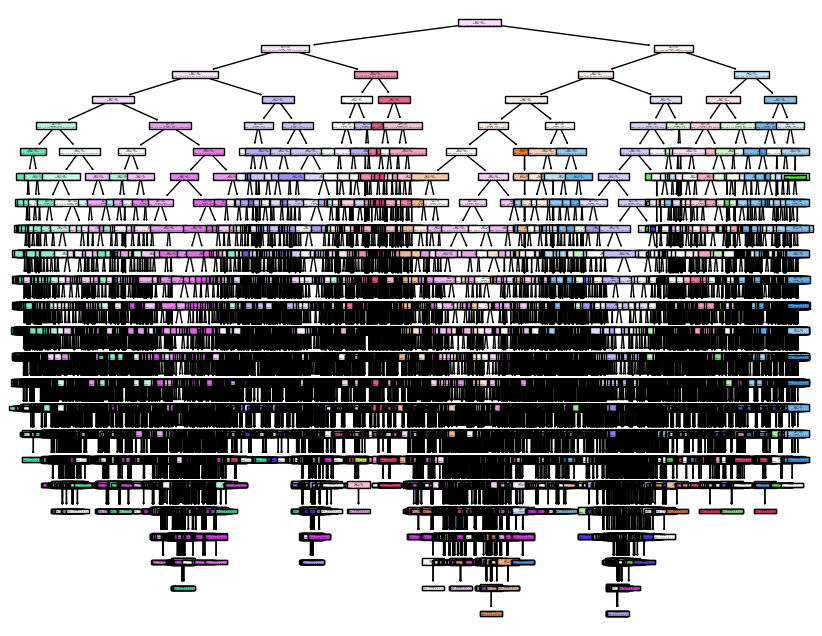

Accuracy: 0.5153597093895601


In [37]:
plt.figure(figsize = (10,8))
clf = DecisionTreeClassifier().fit(X_train, y_train)
plot_tree(clf, filled=True)
plt.show()
print(f"Accuracy: {accuracy_score(y_test, y_preds)}")

### Random forest


In [38]:
RFC = RandomForestClassifier()
RFC.fit(X_train, y_train)
y_preds = RFC.predict(X_test)

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           1       0.62      0.63      0.63      1613
           2       0.41      0.27      0.33       154
           3       0.50      0.48      0.49       553
           4       0.67      0.65      0.66      2226
           5       0.67      0.72      0.69      1292
           6       0.54      0.62      0.58      1184
           7       0.65      0.63      0.64      4074
           8       0.73      0.72      0.72      1567

    accuracy                           0.64     12663
   macro avg       0.60      0.59      0.59     12663
weighted avg       0.64      0.64      0.64     12663



In most of the models, we see that the two groups do not have the expected precision, recall, and F1-score. Therefore, we will examine the confusion matrix to understand what is happening.

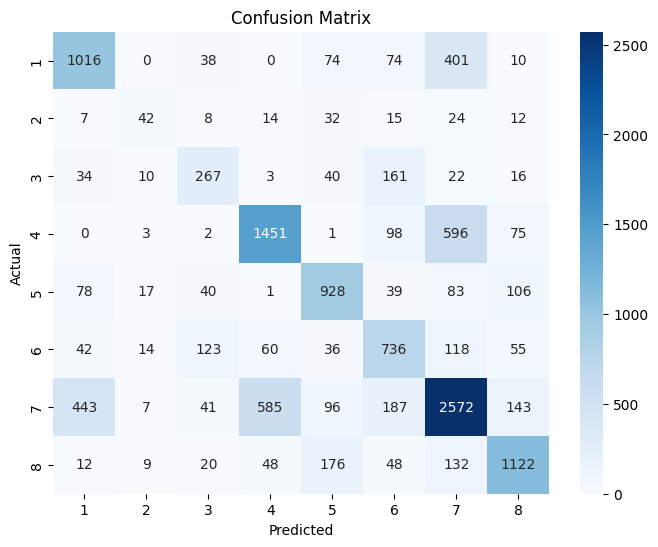

In [39]:
cm = confusion_matrix(y_test, y_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[1,2,3,4,5,6,7,8], yticklabels=[1,2,3,4,5,6,7,8])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Joing clusters 

By examining the confusion matrix, we observe that the model classifies group 2 as group 2 correctly 35 times, but misclassifies group 2 as group 5 31 times. Therefore, we will combine these two groups into one.

In [40]:
df_class_disc7 = df_class_disc.copy()

In [41]:
df_class_disc7['cluster'] = df_class_disc7['cluster'].map({1:1, 2:4, 3:2, 4:3, 5:4, 6:5, 7:6, 8:7})

Re-running the Random Forest model to assess improvement resulting from this merge.

In [42]:
X = df_class_disc7.drop(['cluster', 'apartment_id'], axis=1)
y = df_class_disc7['cluster']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [44]:
RFC = RandomForestClassifier()
RFC.fit(X_train, y_train)
y_preds = RFC.predict(X_test)
print(classification_report(y_test, y_preds))


              precision    recall  f1-score   support

           1       0.62      0.63      0.62      1613
           2       0.50      0.48      0.49       553
           3       0.66      0.65      0.66      2226
           4       0.67      0.70      0.69      1446
           5       0.55      0.63      0.59      1184
           6       0.64      0.62      0.63      4074
           7       0.73      0.71      0.72      1567

    accuracy                           0.64     12663
   macro avg       0.63      0.63      0.63     12663
weighted avg       0.64      0.64      0.64     12663



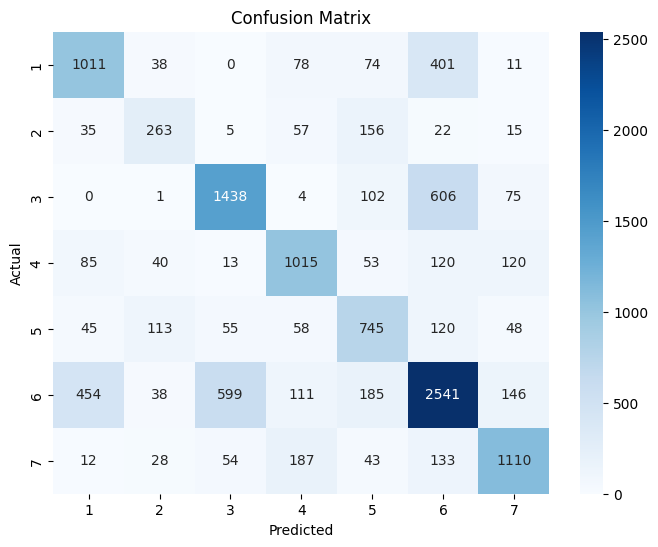

In [45]:
cm = confusion_matrix(y_test, y_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[1,2,3,4,5,6,7], yticklabels=[1,2,3,4,5,6,7])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

After merging the groups, we re-ran the classification and observed improved precision, recall, and F1-score metrics. Additionally, the confusion matrix indicates that the model is accurately classifying the groups. As a result, we have decided to merge groups 3 and 5 together.

In [46]:
df_class_disc6 = df_class_disc7.copy()

In [47]:
df_class_disc6['cluster'] = df_class_disc6['cluster'].map({1:1, 2:2, 3:4, 4:3, 5:4, 6:5, 7:6})

In [48]:
X = df_class_disc6.drop(['cluster', 'apartment_id'], axis=1)
y = df_class_disc6['cluster']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [50]:
RFC = RandomForestClassifier()
RFC.fit(X_train, y_train)
y_preds = RFC.predict(X_test)
print(classification_report(y_test, y_preds))


              precision    recall  f1-score   support

           1       0.62      0.63      0.62      1613
           2       0.52      0.49      0.51       553
           3       0.67      0.71      0.69      1446
           4       0.67      0.70      0.69      3410
           5       0.65      0.62      0.64      4074
           6       0.74      0.72      0.73      1567

    accuracy                           0.66     12663
   macro avg       0.65      0.64      0.64     12663
weighted avg       0.66      0.66      0.66     12663



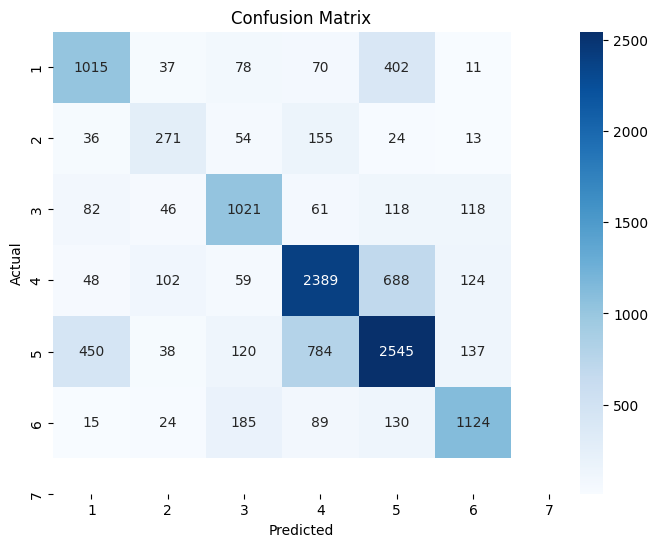

In [51]:
cm = confusion_matrix(y_test, y_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[1,2,3,4,5,6,7], yticklabels=[1,2,3,4,5,6,7])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [52]:
df_class_disc6 = df_class_disc6.apply(pd.to_numeric, errors='coerce')

In [53]:
df_class_disc6.to_csv('df_class_disc6.csv', index=False)

In [54]:
df_class_disc6.head()

,apartment_id,window_noise_traffic_night,window_noise_train_night,view_buildings_mean,view_greenery_mean,view_ground_mean,view_pedestrians_mean,view_street_sum,mean_morning,mean_evening,cluster
0,NaN,1,1,2,4,4,4,2,2,2,5
1,NaN,1,1,1,1,2,2,2,2,2,5
2,NaN,2,1,3,4,2,2,4,2,4,3
3,NaN,1,1,1,2,3,4,1,2,3,5
4,NaN,1,1,1,4,3,1,1,2,1,4


## Second modelling: multivariable classification

To finalize the classification process, we will explore different methods to determine the best model for classifying apartments into the 6 quality classes. Here are the results after conducting the classification:

### Pycaret

![pycaret_result](images/pycaret_results.png)

### AutoML con Azure

![azure_result](images/azure1.png)
![azure_result](images/azure2.png)

### Python script: Random Forest

The python script is avaible to consult in [3-Anexo_2](https://github.com/MarBenitez/quality-houses-class-ml/blob/main/3-anexo_2.ipynb).

![python_script](images/rf_results_6clus.png)

To develop a classification model, we used PyCaret, Azure, and a Random Forest script to determine the best approach. The results showed that the Azure model, which employs an ensemble voting method using multiple models, achieved an accuracy of 0.68. In contrast, PyCaret achieved an accuracy of 0.67 using the Light Gradient Boosting Machine algorithm, which is faster than Random Forest. However, since our goal is to predict house values entered by a user, model speed is not a critical factor. Therefore, we chose the Random Forest model, as it is simpler and adequately meets our needs.